In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
conn = sqlite3.connect('data.db')

In [30]:
# Create a cursor object
cursor = conn.cursor()

In [31]:
cursor.execute("DROP TABLE IF EXISTS SALES")

In [32]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS SALES (
    order_id INTEGER PRIMARY KEY,order_date TEXT,customer_name TEXT,
    product_name TEXT,quantity INTEGER,price REAL,revenue REAL
)
''')

In [33]:
SALES_entries = [
    (1, '2025-08-04', 'Rohit', 'sofa', 1, 10000.0, 10000.0),
    (2, '2025-08-05', 'Anil', 'chair', 5, 1000.0, 5000.0),
    (3, '2025-08-06', 'Arun', 'shoe rack', 1, 2000, 2000.0),
    (4, '2025-08-07', 'Mohit', 'recliner', 3, 60000.0, 180000.0),
(5, '2025-08-08', 'Kiran', 'dining table', 1, 20000.0, 20000.0)]

In [34]:
cursor.executemany('''
INSERT INTO SALES (order_id, order_date, customer_name, product_name, quantity, price, revenue)
VALUES (?, ?, ?, ?, ?, ?, ?)
''', SALES_entries)

In [35]:
# 2. Write and run SQL query
query = """
SELECT product_name, 
       SUM(quantity) AS total_quantity, 
       SUM(quantity * price) AS total_revenue
FROM SALES
GROUP BY product_name
"""
df = pd.read_sql_query(query, conn)

In [36]:
# Step 3: Print the result
print("SALES SUMMARY:\n")
print(df)

SALES SUMMARY:

   product_name  total_quantity  total_revenue
0         chair               5         5000.0
1  dining table               1        20000.0
2      recliner               3       180000.0
3     shoe rack               1         2000.0
4          sofa               1        10000.0


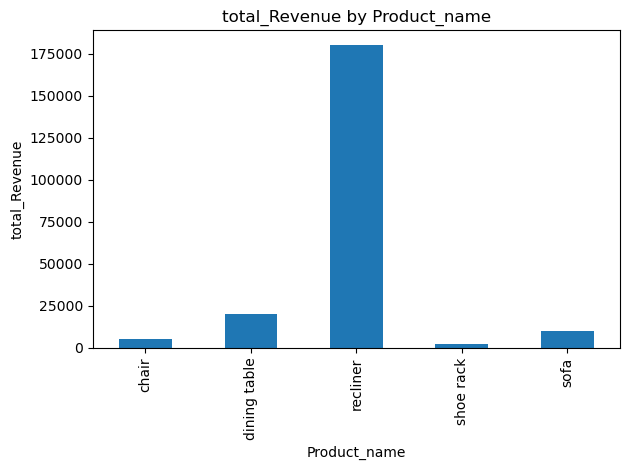

In [37]:
# Step 4: Plot a bar chart
df.plot(kind='bar', x='product_name', y='total_revenue', legend=False)
plt.title("total_Revenue by Product_name")
plt.xlabel("Product_name")
plt.ylabel("total_Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png") 
plt.show()

In [38]:
total_quantity = pd.read_sql_query("SELECT SUM(quantity) AS total_quantity FROM SALES", conn)

In [39]:
total_orders = pd.read_sql_query("SELECT COUNT(*) AS total_orders FROM SALES", conn)

In [40]:
total_revenue = pd.read_sql_query("SELECT SUM(revenue) AS total_revenue FROM SALES", conn)

In [41]:
print(" Total Quantity Sold:", total_quantity.iloc[0]['total_quantity'])
print(" Total Orders:", total_orders.iloc[0]['total_orders'])
print(" Total Revenue: ₹", total_revenue.iloc[0]['total_revenue'])

#conn.close()

 Total Quantity Sold: 11
 Total Orders: 5
 Total Revenue: ₹ 217000.0
